<p style="background:#BF4F51; color:white; font-size: 2.1em; text-align:center"> 
    <br><br><b>COVID-19 Dataset Analysis<br>
    <br>in South Korea</b> <br><br>
    - Preprocessing -<br><br>
</p>

<p style="text-align: right;">Module 1: Data Wrangling with Python<br>
Capstone Project<br>
Author : Renato Mariano</p>

<h2 style="color:#BF4F51">Imports and Data Loading </h2>

In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt

from datetime import date
from suplement_functions import (
    grouped_plots,
    set_month_tick,
    clear_barplot,
)

import warnings
warnings.filterwarnings('ignore')

All the dataframes will be recieve by one dictionary which keys are their names.

In [2]:
# Get list of CSV files
dir_path = r"C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea"
csv_files = glob.glob(dir_path + "/*.csv")

df_dict = {}

for file in csv_files:
    temp_df = pd.read_csv(file)
    df_dict[file[55:-4]] = temp_df
df_dict.keys()

dict_keys(['Case', 'PatientInfo', 'Policy', 'Region', 'SearchTrend', 'SeoulFloating', 'Time', 'TimeAge', 'TimeGender', 'TimeProvince', 'Weather'])

<h2 style="color:#BF4F51">Data Preprocessing </h2>

<h3 style="color:#BF4F51">Case Dataframe</h3>

- Case: Data of COVID-19 infection cases in South Korea

In [3]:
case_df = df_dict['Case']
case_df.tail(9)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
165,6100008,Gyeongsangnam-do,from other city,True,Itaewon Clubs,2,-,-
166,6100009,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
167,6100010,Gyeongsangnam-do,-,False,overseas inflow,26,-,-
168,6100011,Gyeongsangnam-do,-,False,contact with patient,6,-,-
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-
173,7000004,Jeju-do,from other city,True,Itaewon Clubs,1,-,-


- city, latitude and longitude effectively present null values to be read as "-"

group column:
- If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.
- The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection.

infection_case: the name of group or other cases
- The value 'overseas inflow' means that the infection is from other country.
- The value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.

In [4]:
# Conversion of values with "-" into null
case_df["latitude"][(case_df["latitude"] == "-")] = np.nan
case_df["longitude"][(case_df["longitude"] == "-")] = np.nan
case_df["city"][(case_df["city"] == "-")] = np.nan

In [5]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         174 non-null    int64 
 1   province        174 non-null    object
 2   city            121 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        65 non-null     object
 7   longitude       65 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [6]:
# Percentage of null values
round(case_df.isna().sum()*100/len(case_df),2)

case_id            0.00
province           0.00
city              30.46
group              0.00
infection_case     0.00
confirmed          0.00
latitude          62.64
longitude         62.64
dtype: float64

- 30% of the "city" column is null values, no fill will be proceedure since it would increase the incertainty of the analysis.

In [7]:
# Description of the numeric data
case_df.describe().applymap("{:.2f}".format)

,case_id,confirmed
count,174.00,174.00
mean,2686215.76,65.49
std,1943218.48,355.10
min,1000001.00,0.00
25%,1100006.25,4.00
50%,1700003.50,10.00
75%,4100003.75,31.75
max,7000004.00,4511.00


In [8]:
# Description of the object data
case_df.describe(include=["object"]).T

,count,unique,top,freq
province,174,17,Seoul,38
city,121,47,from other city,51
infection_case,174,81,etc,17
latitude,65,65,37.538621,1
longitude,65,65,126.992652,1


- In total we have 174 observations (group/non-group) from 17 provinces.
- The maximal number of cases in a group is 4511.
- 81 unique types of groups of cases (including non-groups)

Which group generated the max number of cases?

In [9]:
case_df[case_df['confirmed']==case_df['confirmed'].max()]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667


- The maximum value of grouped infections belongs to the Shincheonji Church in Daegu.

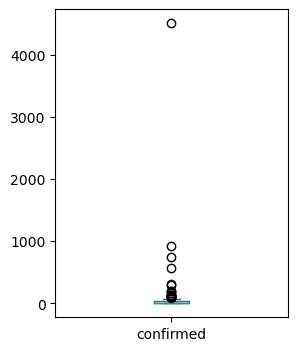

In [10]:
case_df['confirmed'].plot.box(figsize=(3, 4));

- This value represents an obvious outlier. It is however a measured value that represents the reality. 
- No further outlier treatment is required here.

<h3 style="color:#BF4F51">Patient Information</h3>

- PatientInfo: Epidemiological data of COVID-19 patients in South Korea

In [11]:
patient_info = df_dict['PatientInfo']
patient_info.tail(6)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5159,7000000014,female,30s,Korea,Jeju-do,Jeju-do,Itaewon Clubs,NaN,140,NaN,2020-05-09,2020-06-12,NaN,released
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


- For this table the columns are more self-explanatory.

In [12]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


- The table posesses 5165 entries
- Many features present null values

Removal of the 's' from the age column

In [13]:
patient_info['age'] = patient_info['age'].str.replace('s', '')

<h4 style="color:#BF4F51">Treating Null Values</h4>

In [14]:
# Percentage of null values
round(patient_info.isna().sum()*100/len(patient_info),2)

patient_id             0.00
sex                   21.72
age                   26.72
country                0.00
province               0.00
city                   1.82
infection_case        17.79
infected_by           73.94
contact_number        84.69
symptom_onset_date    86.64
confirmed_date         0.06
released_date         69.27
deceased_date         98.72
state                  0.00
dtype: float64

- Sex and age will not be filled (impossible to estimate a reliable value for these features)
- Among the date columns, only "confirmed_date" will be filled.

- Only 2% percent of <b>"city"</b> is null
- These values (in "city") will be filled with the mode for each province

In [15]:
# Get the positions where city is null
patient_city = patient_info[["city"]].isnull()

# define the provinces with city missing
prov_list = patient_info[patient_city["city"]]["province"].unique().tolist()

mode_prov = {}  # dict with province:mode_city

for prov in prov_list:
    if prov == "Gwangju":  # this province/metropolis had only empty city values
        mode_prov["Gwangju"] = "Gwangju"
    else:
        # find the mode for the province in the list
        mode_prov[prov] = (
            patient_info[patient_info["province"] == prov]["city"].mode().loc[0]
        )
print(mode_prov)

{'Busan': 'Dongnae-gu', 'Daegu': 'Dalseo-gu', 'Gwangju': 'Gwangju', 'Incheon': 'Bupyeong-gu', 'Gyeongsangnam-do': 'Changwon-si'}


In [16]:
# Fill the null with dict values
patient_info['city'].fillna(patient_info['province'].map(mode_prov), inplace=True)
patient_info[patient_city["city"]].head(5)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1318,1100000007,male,20,China,Busan,Dongnae-gu,Shincheonji Church,NaN,485,NaN,2020-02-22,NaN,NaN,released
1463,1200000031,female,60,Korea,Daegu,Dalseo-gu,Shincheonji Church,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated
1474,1200000047,female,60,Korea,Daegu,Dalseo-gu,Shincheonji Church,1200000031,NaN,NaN,2020-02-19,NaN,NaN,isolated
1475,1200000048,female,70,Korea,Daegu,Dalseo-gu,Shincheonji Church,1200000031,NaN,NaN,2020-02-19,NaN,NaN,isolated
1476,1200000049,male,50,Korea,Daegu,Dalseo-gu,Shincheonji Church,1200000031,NaN,NaN,2020-02-19,NaN,NaN,isolated


- Null <b>"infection_case"</b> will be filled with "unkown"

In [17]:
patient_info['infection_case']=patient_info['infection_case'].fillna('unknown')

- <b>"contact_number"</b> will be converted into numerical

In [18]:
patient_info["contact_number"][(patient_info["contact_number"]  == "-")] = np.nan
patient_info["contact_number"] = patient_info["contact_number"].astype('float')

- Sort the values of "contact_number" to search for outliers.

In [19]:
patient_info.sort_values(by="contact_number", ascending=False).head(7)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5110,6100000098,male,60,Korea,Gyeongsangnam-do,Jinju-si,etc,6100000097,6.100000e+09,2020-03-28,2020-03-31,NaN,NaN,released
5109,6100000097,female,60,Korea,Gyeongsangnam-do,Jinju-si,etc,NaN,6.100000e+09,2020-03-26,2020-03-31,NaN,NaN,released
818,1000000819,NaN,NaN,Korea,Seoul,Eunpyeong-gu,unknown,NaN,1.000001e+09,NaN,2020-05-27,NaN,NaN,released
1463,1200000031,female,60,Korea,Daegu,Dalseo-gu,Shincheonji Church,NaN,1.160000e+03,NaN,2020-02-18,NaN,NaN,isolated
1312,1100000001,male,10,Korea,Busan,Dongnae-gu,Onchun Church,NaN,1.091000e+03,NaN,2020-02-21,NaN,NaN,released
1318,1100000007,male,20,China,Busan,Dongnae-gu,Shincheonji Church,NaN,4.850000e+02,NaN,2020-02-22,NaN,NaN,released
1600,1300000001,female,40,Korea,Gwangju,Gwangju,overseas inflow,NaN,4.500000e+02,2020-01-27,2020-02-03,2020-02-20,NaN,released


- The first 3 values represent clear wrong input in the system (Contact with more than 1 billion people?). They will be replaced by null values.
- The 2 values over 1000 contacts also seem high, but could be normal for a church in february, depending on its size.

In [20]:
# Replace of outliers by null values in "contact_number"
patient_info.loc[[5110,5109,818],"contact_number"] = np.nan

- The only other null values that we want to replace are in <b>"confirmed_date"</b>

In [21]:
patient_info[patient_info['confirmed_date'].isnull()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4730,6011000051,female,40,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4731,6011000052,female,0,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4732,6011000053,female,10,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,2020-04-15,NaN,NaN,NaN,released


- These only 3 values will be replace with a date 3 days after the "symptom_onset_date" for the 3rd row.
- By checking the other rows I realized that the index was not necessarily organized by date, so it made more sense to fill with a fixed value.

In [22]:
patient_info['confirmed_date'].fillna('2020-04-18', inplace=True)

In [23]:
round(patient_info.isna().sum()*100/len(patient_info),2)

patient_id             0.00
sex                   21.72
age                   26.72
country                0.00
province               0.00
city                   0.00
infection_case         0.00
infected_by           73.94
contact_number        84.82
symptom_onset_date    86.64
confirmed_date         0.00
released_date         69.27
deceased_date         98.72
state                  0.00
dtype: float64

<h3 style="color:#BF4F51">Time Series Dataframes</h3>

- Time: Time series data of COVID-19 status in South Korea
- TimeAge: Time series data of COVID-19 status in terms of the age in South Korea
- TimeGender: Time series data of COVID-19 status in terms of gender in South Korea
- TimeProvince: Time series data of COVID-19 status in terms of the Province in South Korea

Let's get an overview of the shape of all the time dataframes

In [24]:
print(
    " Dataframe      shape\n",
    f"Time:         {df_dict['Time'].shape}\n",
    f"TimeAge:      {df_dict['TimeAge'].shape}\n",
    f"TimeGender:   {df_dict['TimeGender'].shape}\n",
    f"TimeProvince: {df_dict['TimeProvince'].shape}",
)

 Dataframe      shape
 Time:         (163, 7)
 TimeAge:      (1089, 5)
 TimeGender:   (242, 5)
 TimeProvince: (2771, 6)


As expected their shape is different because of the classifications that were carried out in each dataframe.

In [25]:
df_dict["Time"].head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


- These "Time" tables represent accumulated values of cases per day
- "time" column is irrelevant for the analysis --> Some days were stored at 16:00 (beginning), some at 00:00.
- For the other tables, the grouping is made by Age Group, Sex, or Province.

In [26]:
df_dict["Time"].info()
#df_dict['TimeAge'].info()
#df_dict['TimeGender'].info()
#df_dict['TimeProvince'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


- The time dataframe has 163 rows with valid values.
- None of these 4 "Time" dataframes presents Null values.
- 'date' column should be converted (In the main notebook).

Let's make references for these dataframes outside of the dictionary.
'Time' column will be dropped.

In [27]:
time_df = df_dict["Time"]
time_age = df_dict["TimeAge"]
time_gender = df_dict["TimeGender"]
time_province = df_dict["TimeProvince"]

In [28]:
time_df.drop("time", axis=1, inplace=True)
time_age.drop("time", axis=1, inplace=True)
time_gender.drop("time", axis=1, inplace=True)
time_province.drop("time", axis=1, inplace=True)

In [29]:
time_df.head(5)
#time_age.head(2)
#time_gender.head(2)
#time_province.head(2)

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0


For the 'TimeAge' dataframe a removal of the 's' from the age column will be proceeded

In [30]:
time_age['age'] = time_age['age'].str.replace('s', '')

The function "describe()" could be carried out, but as we have accumulated values over time, the results of the description could be missleading. The maximum values for each features give us however some insights.

In [31]:
#time_df.describe().applymap("{:.2f}".format)
time_df.max()

date         2020-06-30
test            1273766
negative        1240157
confirmed         12800
released          11537
deceased            282
dtype: object

A total of 12,800 confirmed cases and 282 deaths are presented in the dataset.

Do all the "Time" dataframes present the same number of confirmed cases?

In [32]:
print("Dataframe     Confirmed cases")
print(f"Time          {time_df['confirmed'].max()}")
print(f"TimeAge       {time_gender['confirmed'].tail(2).sum()}")
print(f"TimeGender    {time_age['confirmed'].tail(9).sum()}")
print(
    f"TimeProvince  {time_province['confirmed'].tail(time_province['province'].unique().size).sum()}"
)

Dataframe     Confirmed cases
Time          12800
TimeAge       12800
TimeGender    12800
TimeProvince  12076


TimeProvince presents less confirmed cases than the other time series dataframes, that happened probably during the scraping of the dataframe and the choices that the author took to produce them.

<h3 style="color:#BF4F51">Additional Dataframes</h3>

- <b>Region</b>: Location and statistical data of the regions in South Korea
- <b>Weather</b>: Data of the weather in the regions of South Korea
- <b>SearchTrend</b>: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
- <b>SeoulFloating</b>: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)
- <b>Policy</b>: Data of the government policy for COVID-19 in South Korea

In [33]:
df_dict.keys()

dict_keys(['Case', 'PatientInfo', 'Policy', 'Region', 'SearchTrend', 'SeoulFloating', 'Time', 'TimeAge', 'TimeGender', 'TimeProvince', 'Weather'])

- For the proposed questions, only the "Policy" dataframe would be still important. <br>
- So that will be the last evaluated table, before going back to the EDA.

In [34]:
policy_df=df_dict['Policy']
policy_df

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [35]:
round(policy_df.isna().sum()*100/len(patient_info),2)

policy_id     0.00
country       0.00
type          0.00
gov_policy    0.00
detail        0.04
start_date    0.00
end_date      0.72
dtype: float64

For the date where this dataframe was released many policies were still being applied, so it is to be expected null values in the "end_date" column. 

In [36]:
policy_df[policy_df['detail'].isna()]

,policy_id,country,type,gov_policy,detail,start_date,end_date
50,51,Korea,Technology,Self-Diagnosis App,NaN,2020-02-12,NaN
51,52,Korea,Technology,Self-Quarantine Safety Protection App,NaN,2020-03-07,NaN


The null values for policy detail are self-explanatory.

<h2 style="color:#BF4F51">Data Export </h2>

Let's get the original path and names for the data and change the directory for automatic saving.

In [37]:
dir_path = r"C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea"
csv_files = glob.glob(dir_path + "/*.csv")
csv_files = [file.replace('_data_Korea', '_data_Korea_modif') for file in csv_files]
csv_files

['C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\Case.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\PatientInfo.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\Policy.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\Region.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\SearchTrend.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\SeoulFloating.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\Time.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\TimeAge.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\TimeGender.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\TimeProvince.csv',
 'C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif\\Weather.csv']

Save all the updated data

In [38]:
#for file in csv_files:
#   df_dict[file[61:-4]].to_csv(file, sep=',', encoding='utf-8', index=False)

In [39]:
#df_dict[csv_files[1][61:-4]].to_csv(csv_files[1], sep=',', encoding='utf-8', index=False)